<a href="https://colab.research.google.com/github/VARSHAMG23/ML-Algorithms/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
df=pd.read_csv('Boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
df.shape

(506, 14)

In [12]:
df.dtypes

,0
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64


In [13]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [14]:
df.duplicated().sum()

np.int64(0)

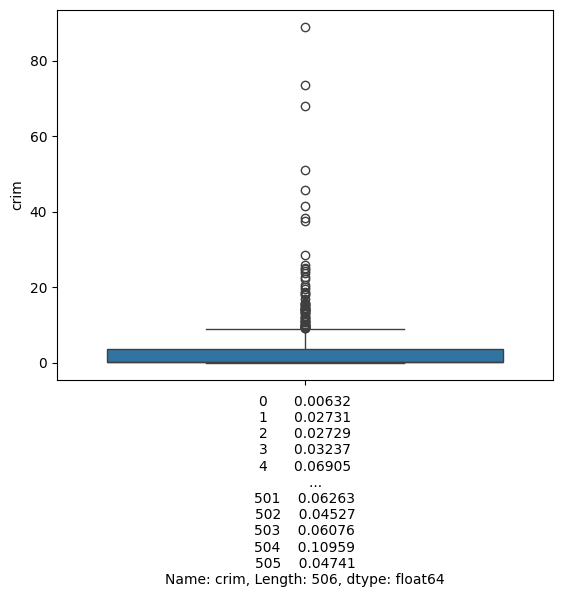

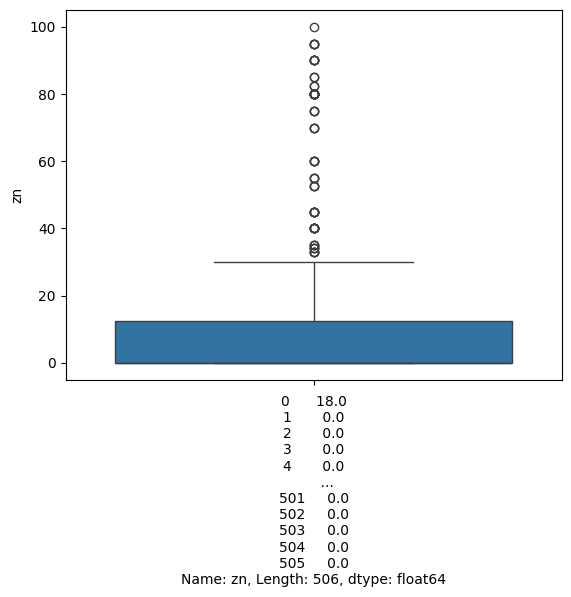

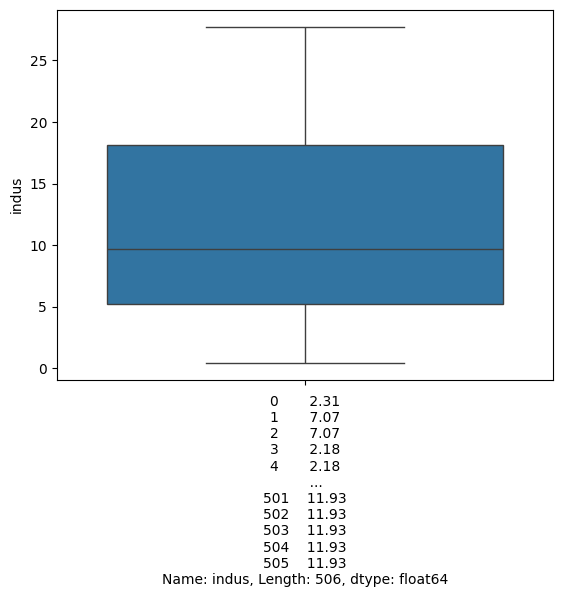

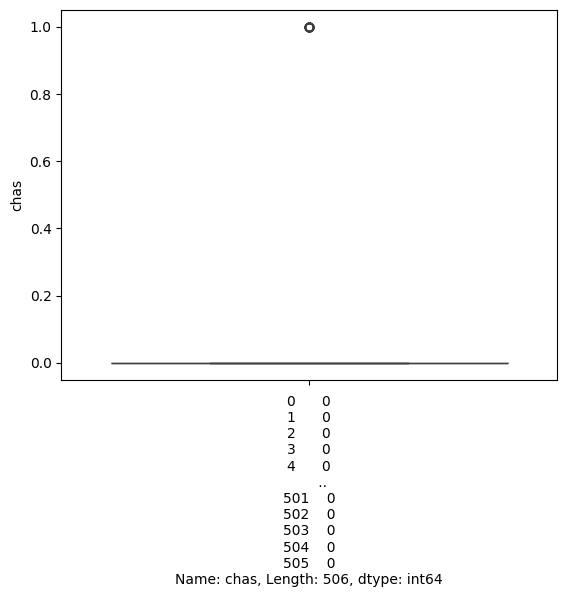

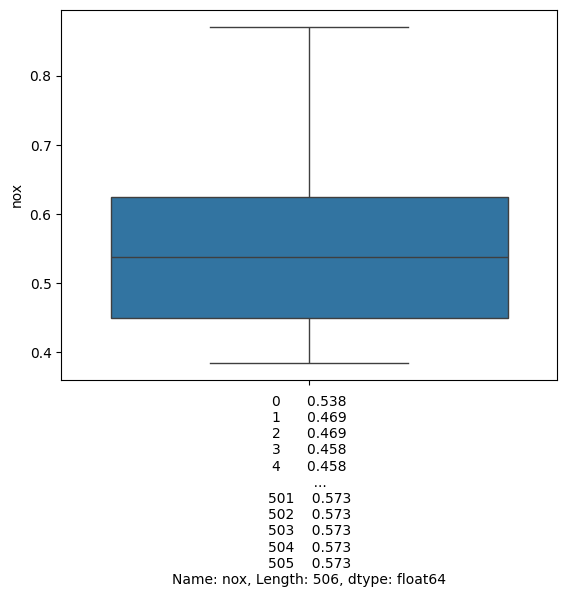

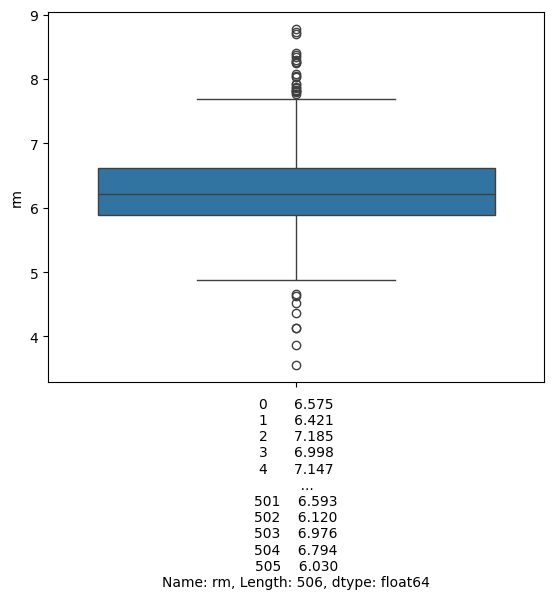

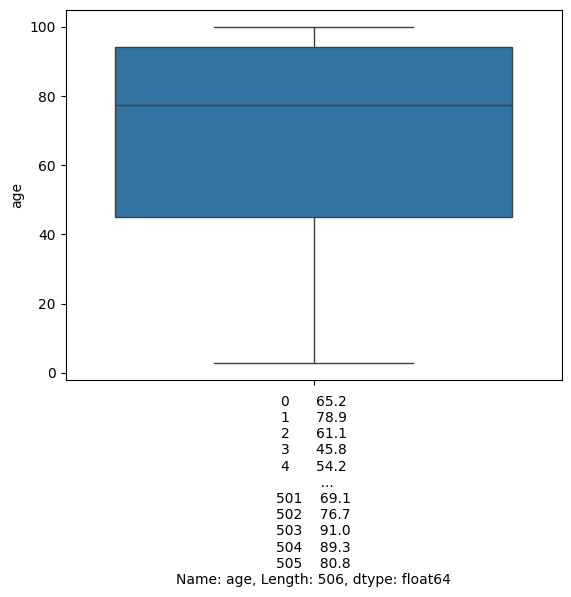

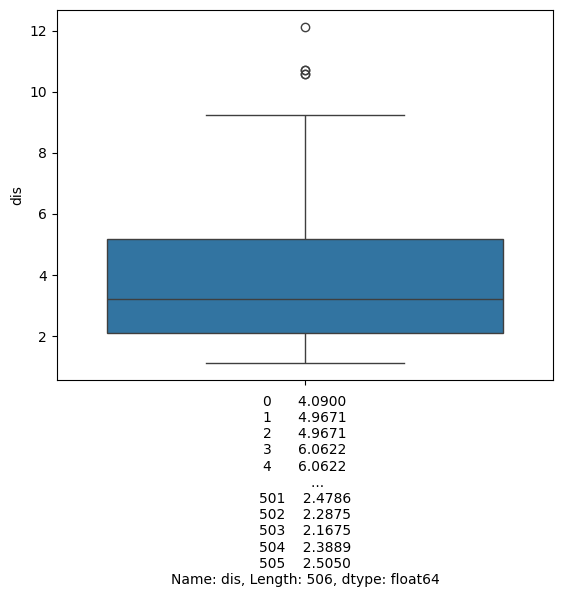

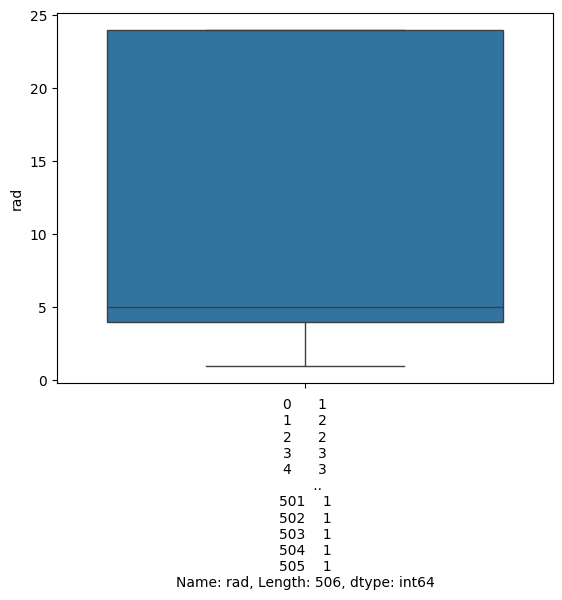

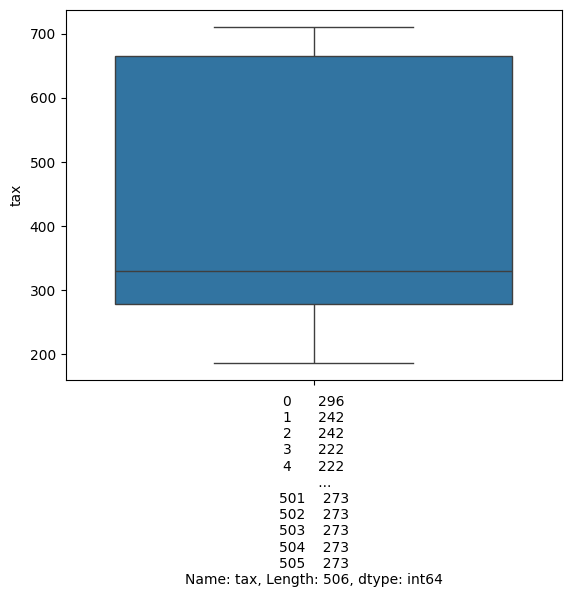

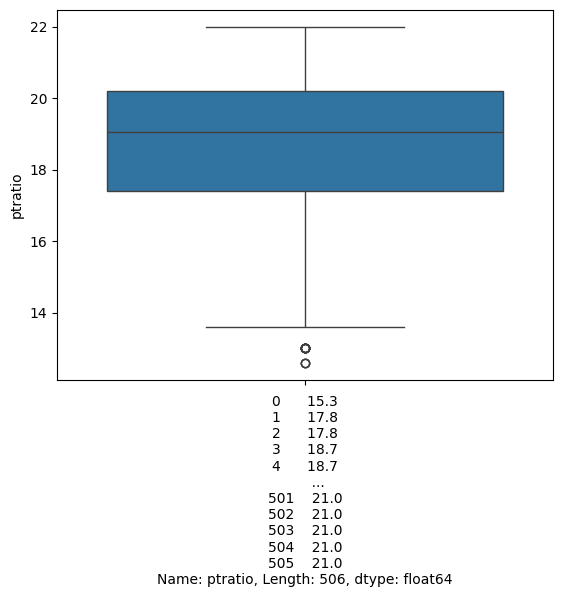

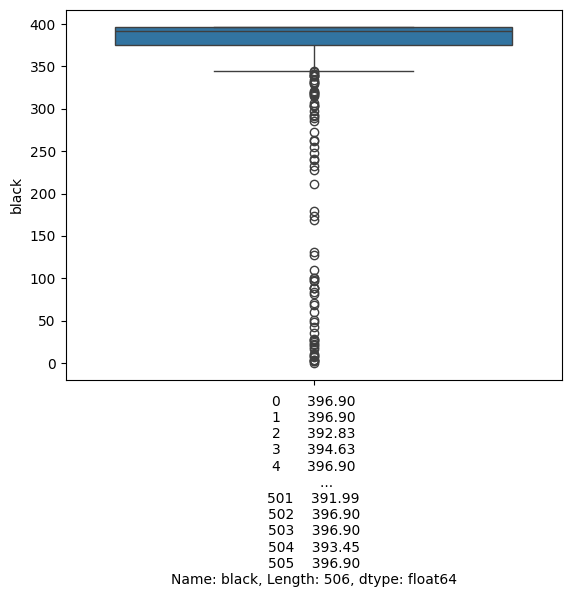

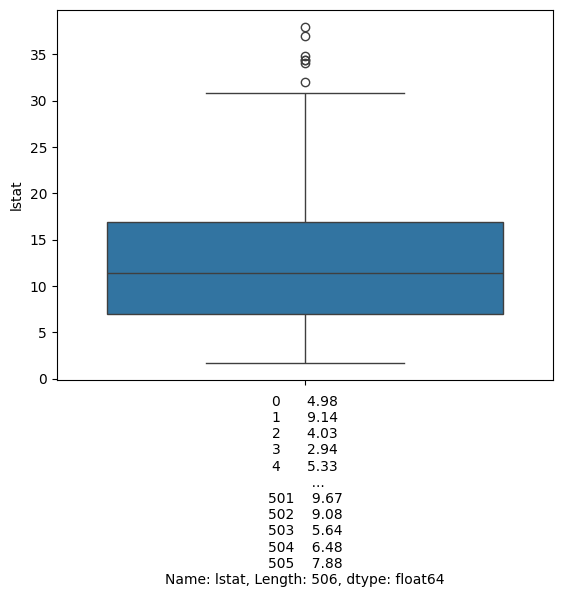

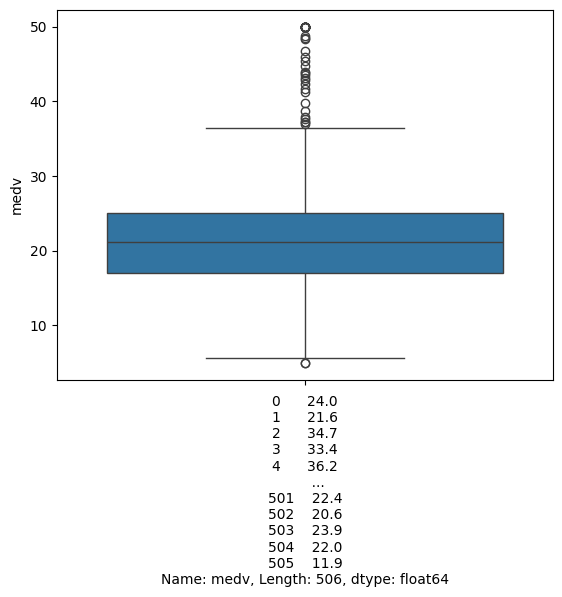

In [17]:
for col in df.columns:
  if df[col].dtype!='object':
    sns.boxplot(df[col])
    plt.xlabel(df[col])
    plt.show()

In [26]:
def remove_outliers(df,columns):
  for col in columns:
    if col in df.columns:
      q1=df[col].quantile(0.25)
      q3=df[col].quantile(0.75)
      IQR=q3-q1
      lower_bound=q1-1.5*IQR
      upper_bound=q3+1.5*IQR
      df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]
  return df




In [39]:
df_without_outliers=remove_outliers(df,df.columns)
df_without_outliers.shape

(214, 14)

In [34]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [35]:
X=df.drop(columns='medv')
y=df['medv']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)

In [37]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
lr.coef_

array([-8.14896492e-02,  4.80407782e-02, -5.47150249e-03,  3.06260576e+00,
       -1.61368815e+01,  3.67245067e+00, -8.51525259e-03, -1.51740854e+00,
        2.87271007e-01, -1.21207598e-02, -9.24160757e-01,  9.53460812e-03,
       -4.85895548e-01])

In [40]:
lr.intercept_

np.float64(36.33377028550763)

In [42]:
y_pred=lr.predict(X_test)
pd.DataFrame({'Actual':y_test,'Predict':y_pred})

,Actual,Predict
198,34.6,34.408110
229,31.5,31.185246
502,20.6,22.312861
31,14.5,17.886139
315,16.2,20.435721
...,...,...
166,50.0,36.185086
401,7.2,18.010970
368,50.0,23.182265
140,14.0,13.772710


In [43]:
r2_score(y_test,y_pred)

0.75550330868713

In [45]:
mse=mean_squared_error(y_test,y_pred)
mse

23.61699410056368